In [1]:
# Stock Prediction using LSTM for TCS Stock Historical Data in CSV format

In [2]:
import np
# Importing pandas library
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('TCS_stock_history.csv')

In [3]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0
...,...,...,...,...,...,...,...,...
4458,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754,0.0,0.0
4459,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362,0.0,0.0
4460,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075,0.0,0.0
4461,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,2489161,0.0,0.0


In [4]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
std,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842
min,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000


In [5]:
# Converting String to Datetime Format
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0
...,...,...,...,...,...,...,...,...
4458,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754,0.0,0.0
4459,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362,0.0,0.0
4460,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075,0.0,0.0
4461,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,2489161,0.0,0.0


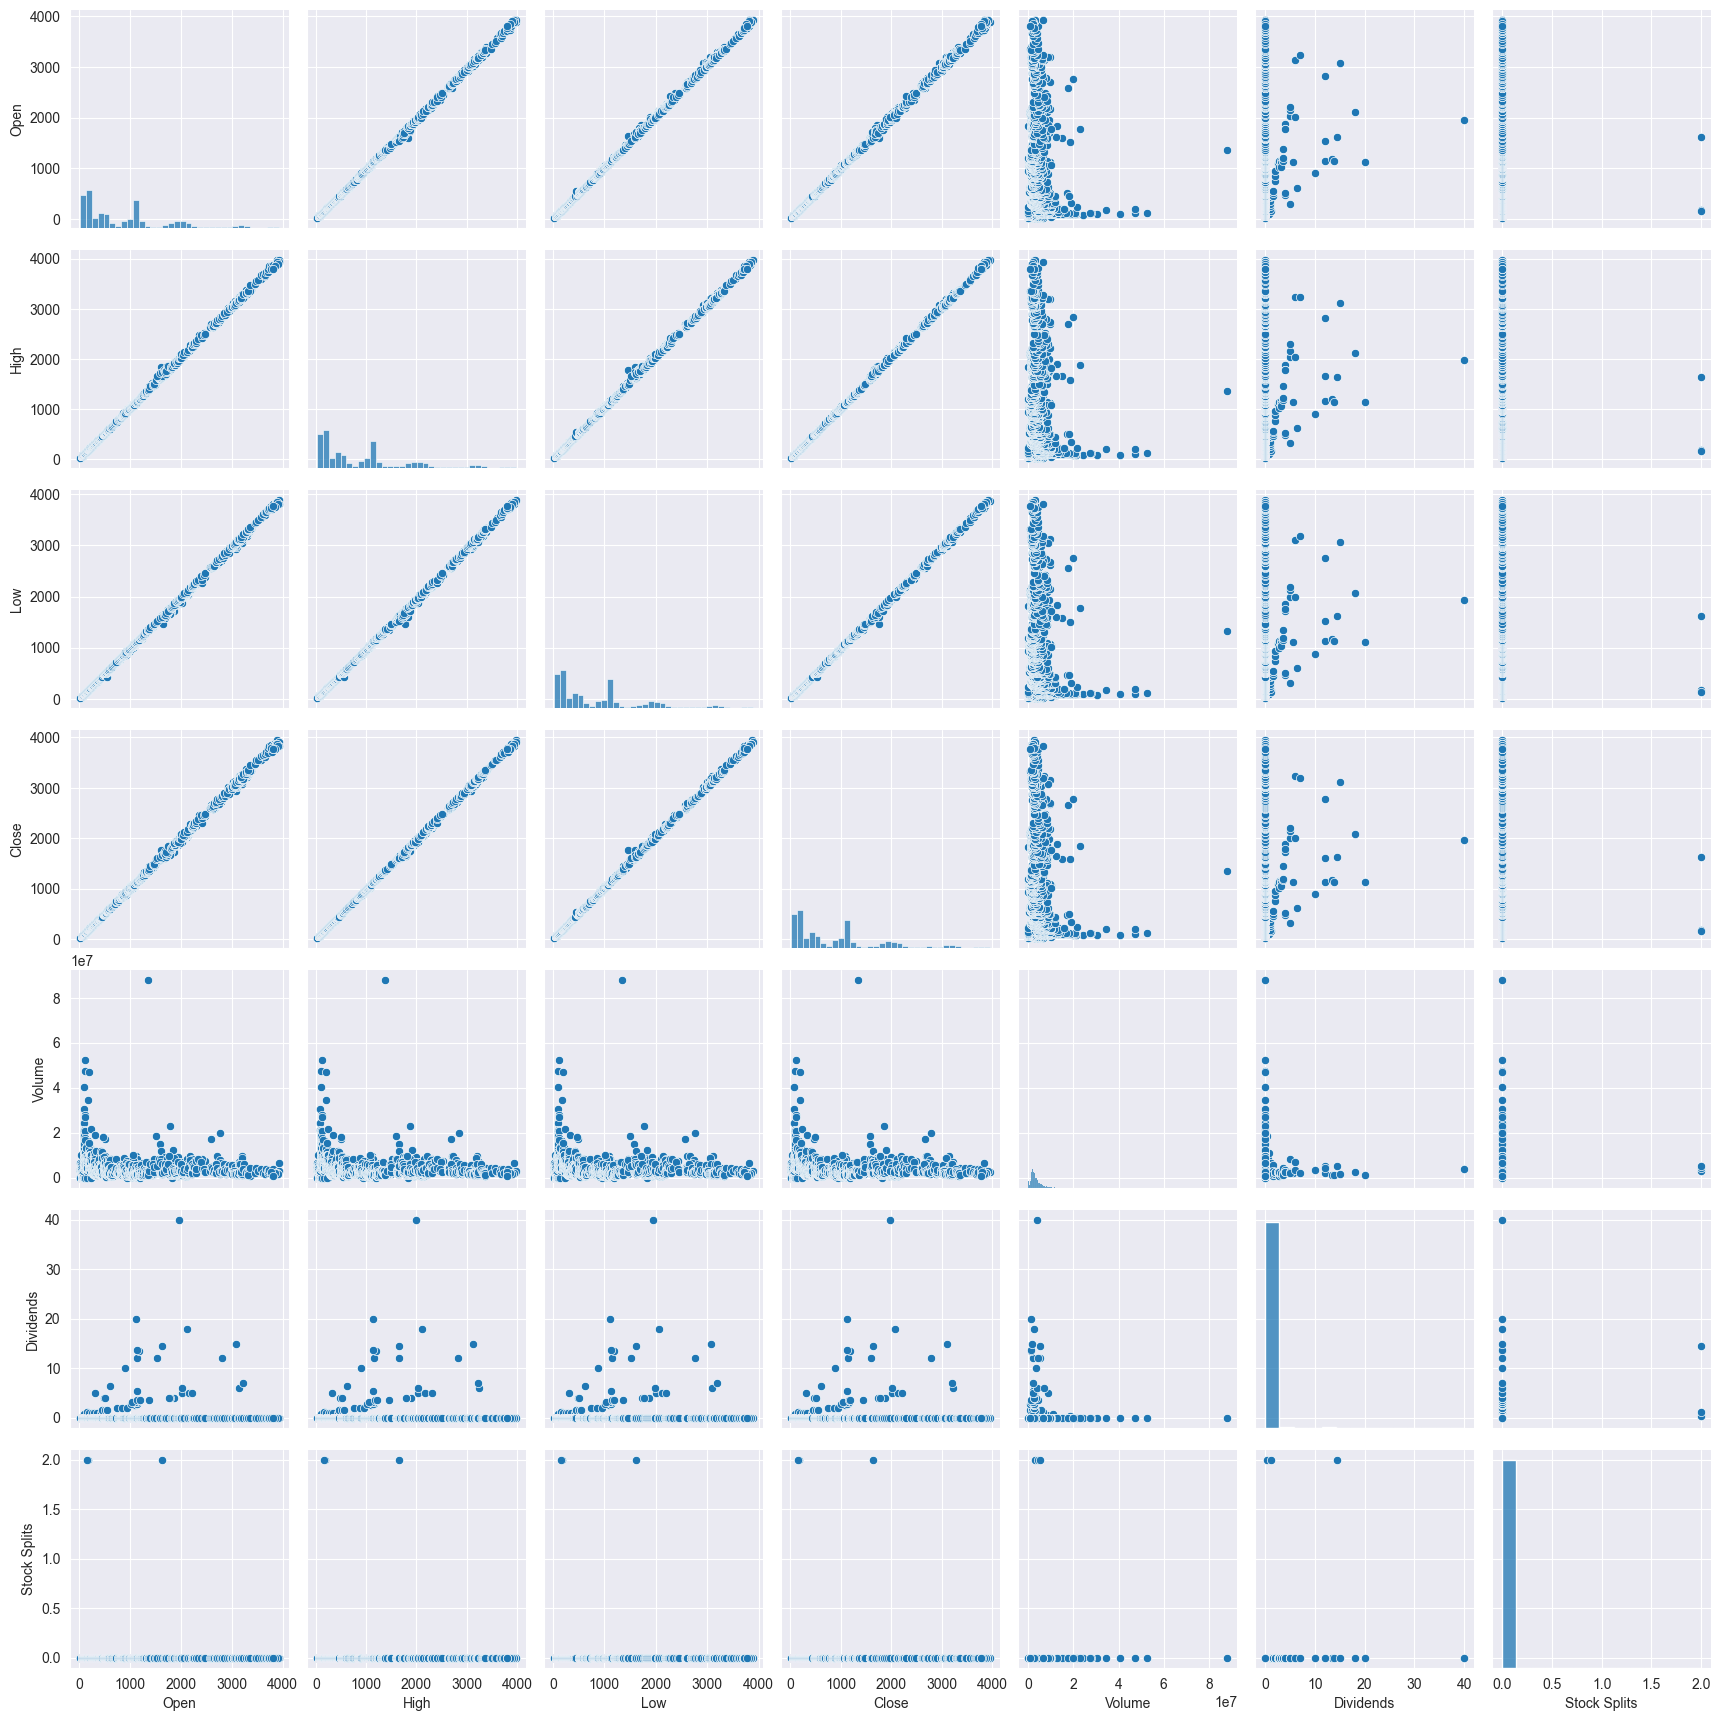

In [6]:
# Using seaborn library for visualization
import seaborn as sns

sns.pairplot(df)

In [7]:
# Correlation of the features
corr = df.corr()
corr

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,1.000000,0.899114,0.899354,0.898962,0.899214,-0.177351,0.062321,-0.005701
Open,0.899114,1.000000,0.999888,0.999892,0.999787,-0.153362,0.059743,-0.006715
High,0.899354,0.999888,1.000000,0.999867,0.999914,-0.150918,0.060044,-0.006597
Low,0.898962,0.999892,0.999867,1.000000,0.999901,-0.154962,0.059916,-0.006622
Close,0.899214,0.999787,0.999914,0.999901,1.000000,-0.152844,0.060179,-0.006635
Volume,-0.177351,-0.153362,-0.150918,-0.154962,-0.152844,1.000000,-0.010332,0.004752
Dividends,0.062321,0.059743,0.060044,0.059916,0.060179,-0.010332,1.000000,0.142493
Stock Splits,-0.005701,-0.006715,-0.006597,-0.006622,-0.006635,0.004752,0.142493,1.000000


In [8]:
# Correlation of the feature with the target
corr_with_close = df.corr()['Close'].sort_values(ascending=False)
corr_with_close

Close           1.000000
High            0.999914
Low             0.999901
Open            0.999787
Date            0.899214
Dividends       0.060179
Stock Splits   -0.006635
Volume         -0.152844
Name: Close, dtype: float64

<Axes: >

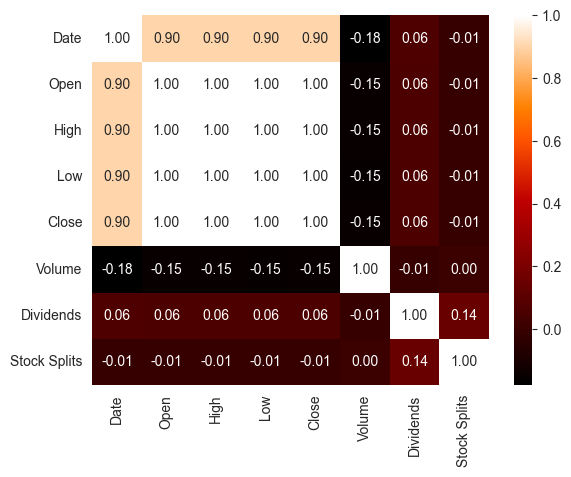

In [9]:
# using seaborn heatmap
sns.heatmap(corr, annot=True, cmap='gist_heat', fmt='.2f')

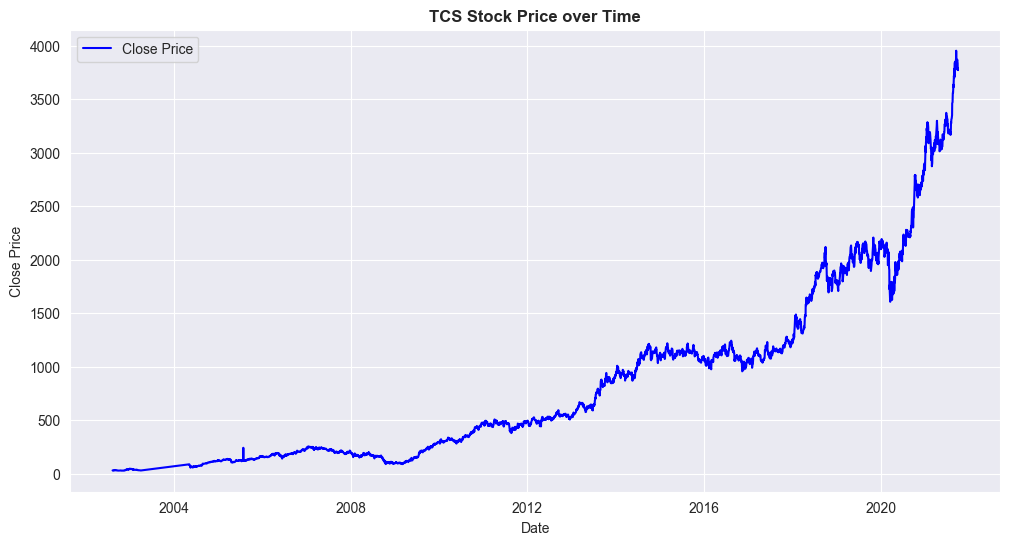

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('TCS Stock Price over Time', weight="bold")
plt.legend()
plt.show()

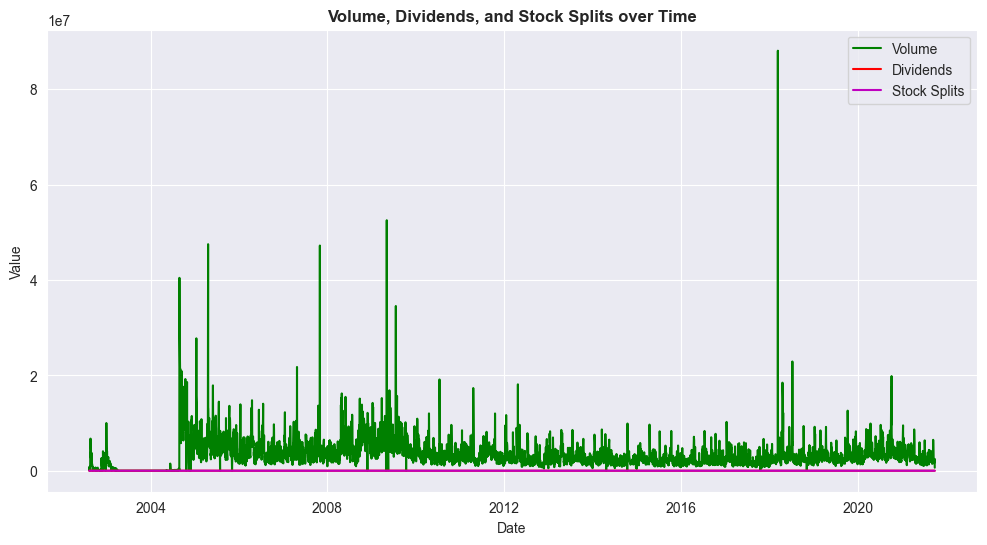

In [11]:
# Volume, Dividends, Stock Splits
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], label='Volume', color='g')
plt.plot(df['Date'], df['Dividends'], label='Dividends', color='r')
plt.plot(df['Date'], df['Stock Splits'], label='Stock Splits', color='m')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume, Dividends, and Stock Splits over Time', weight="bold")
plt.legend()
plt.show()

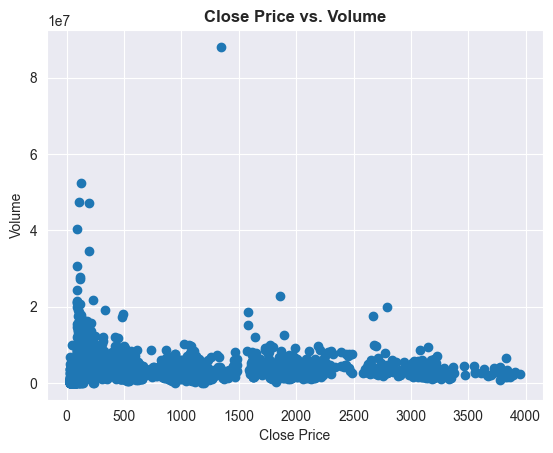

In [12]:
# Close vs Volume
plt.scatter(df['Close'], df['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Close Price vs. Volume', weight="bold")
plt.show()

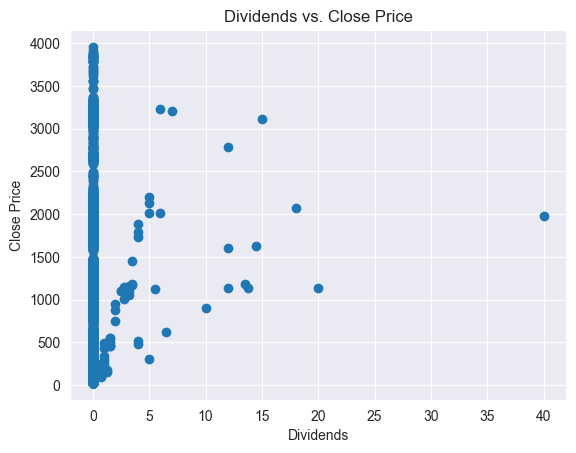

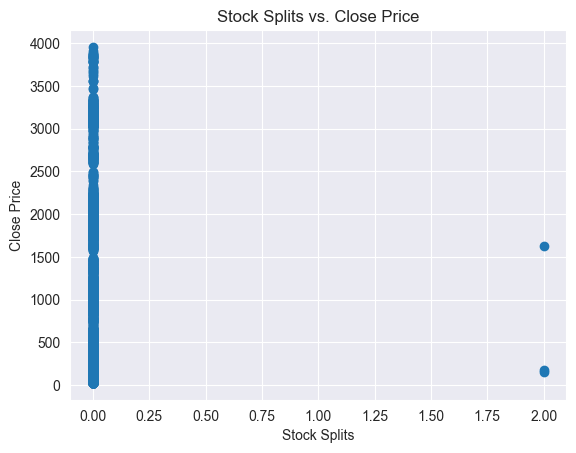

In [13]:
# Dividends vs. Close Price
plt.scatter(df['Dividends'], df['Close'])
plt.xlabel('Dividends')
plt.ylabel('Close Price')
plt.title('Dividends vs. Close Price')
plt.show()

# Stock Splits vs. Close Price
plt.scatter(df['Stock Splits'], df['Close'])
plt.xlabel('Stock Splits')
plt.ylabel('Close Price')
plt.title('Stock Splits vs. Close Price')
plt.show()

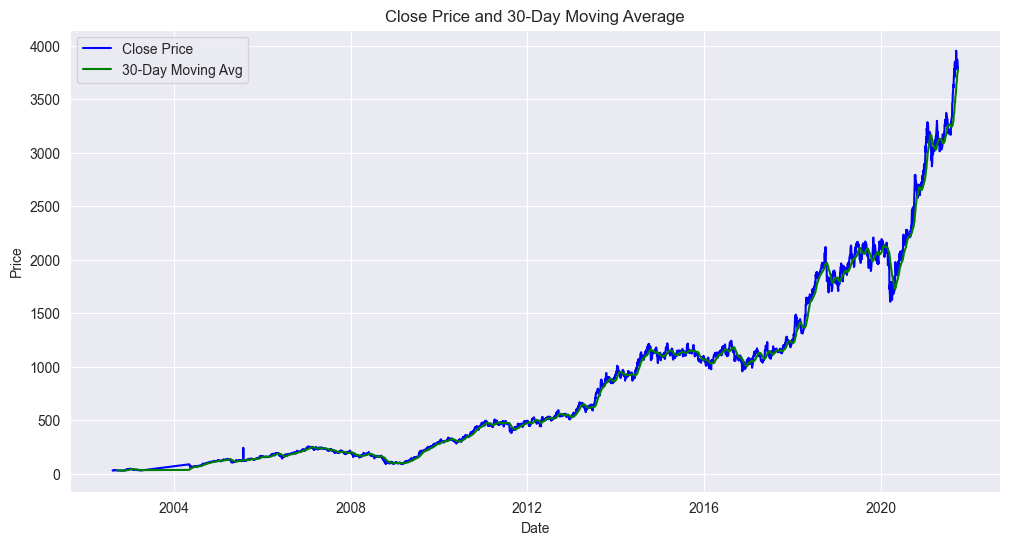

In [14]:
# Moving Average
df['30-Day Moving Avg'] = df['Close'].rolling(window=30).mean()

# Plot Close price and moving average
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='b')
plt.plot(df['Date'], df['30-Day Moving Avg'], label='30-Day Moving Avg', color='g')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and 30-Day Moving Average')
plt.legend()
plt.show()

In [15]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,30-Day Moving Avg
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0,NaN
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0,NaN
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0,NaN
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0,NaN
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
4458,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754,0.0,0.0,3736.128320
4459,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362,0.0,0.0,3752.301652
4460,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075,0.0,0.0,3762.826652
4461,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,2489161,0.0,0.0,3773.458317


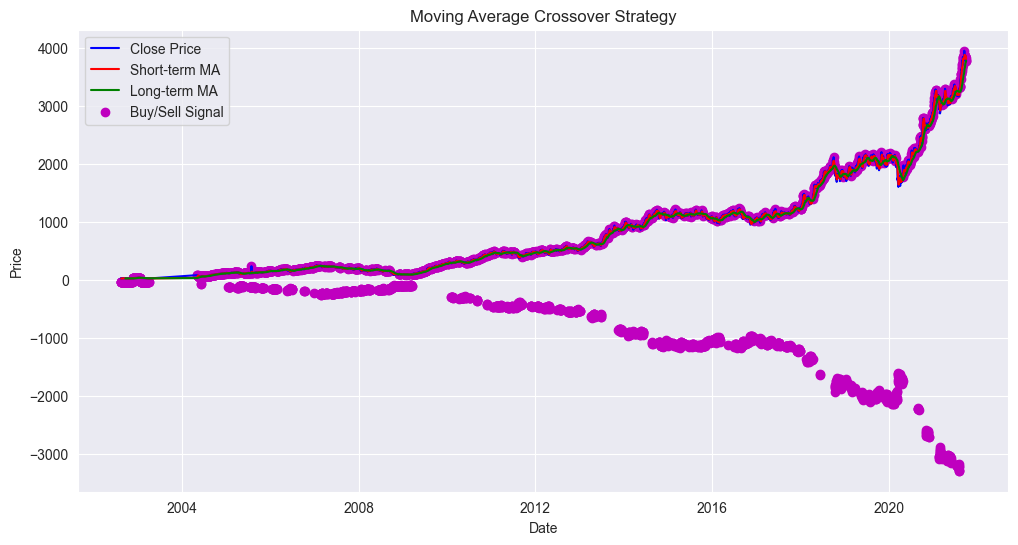

In [16]:
# Moving Average crossover
df['Short_MA'] = df['Close'].rolling(window=5).mean()
df['Long_MA'] = df['Close'].rolling(window=30).mean()

# Creating a trading signals based on moving average crossovers
df['Signal'] = np.where(df['Short_MA'] > df['Long_MA'], 1, -1)

# Plot the strategy signals
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='b')
plt.plot(df['Date'], df['Short_MA'], label='Short-term MA', color='r')
plt.plot(df['Date'], df['Long_MA'], label='Long-term MA', color='g')
plt.scatter(df['Date'], df['Close'] * df['Signal'], label='Buy/Sell Signal', marker='o', color='m')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()

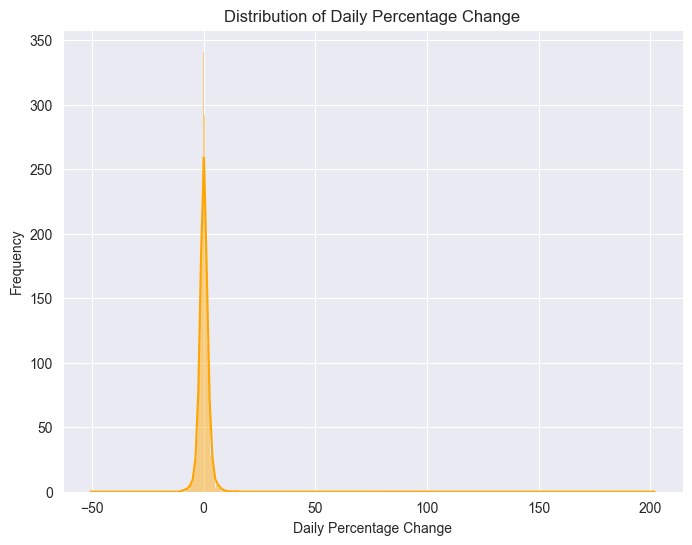

In [17]:
# Daily price change
df['Daily_Price_Change'] = df['Close'].pct_change() * 100

# Distribution of daily percentage change
plt.figure(figsize=(8, 6))
sns.histplot(df['Daily_Price_Change'].dropna(), kde=True, color='orange')
plt.xlabel('Daily Percentage Change')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Percentage Change')
plt.show()

In [18]:
df['Moving_Avg_Close'] = df['Close'].rolling(window=7).mean()

In [19]:
df.shape

(4463, 14)

In [20]:
# Prepare the data for LSTM
X_train = df['Close'].values.reshape(-1, 1)
y_train = df['Close'].shift(-1).dropna().values

# Normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define the test data
test_ratio = 0.2
test_size = int(len(df) * test_ratio)
test_data = df[-test_size:]

# Prepare the data for prediction
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

In [21]:
# Reshape the data for LSTM
X_train_lstm = X_train_scaled[:-1].reshape(-1, 1, 1)
y_train_lstm = X_train_scaled[1:]

In [22]:
# Using LSTM
import tensorflow as tf

print(tf.__version__)

2.15.0


In [23]:
# Importing important libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
# Initializing the model
model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
from tqdm import tqdm

# Train the model with tqdm progress bar
# Set the number of epochs and batch size
epochs = 30
batch_size = 15
for epoch in tqdm(range(epochs)):
    for i in range(0, len(X_train_lstm), batch_size):
        X_batch = X_train_lstm[i:i + batch_size]
        y_batch = y_train_lstm[i:i + batch_size]
        model.train_on_batch(X_batch, y_batch)

# Prepare the data for prediction
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [05:05<00:00, 10.19s/it]


In [26]:
# Predicting the data
lstm_predictions = model.predict(X_test_lstm).flatten()
lstm_predictions

28/28 [==============================] - 1s 4ms/step


array([0.36062443, 0.3614782 , 0.36035776, 0.3628656 , 0.37443122,
       0.37536776, 0.3784025 , 0.37317455, 0.37443712, 0.3735717 ,
       0.3738859 , 0.38196447, 0.37449047, 0.3726707 , 0.3698846 ,
       0.37345907, 0.37559888, 0.35599387, 0.35600573, 0.35396612,
       0.34874818, 0.34937668, 0.35339105, 0.35243034, 0.34941828,
       0.3478528 , 0.34771642, 0.3513572 , 0.3515291 , 0.35870346,
       0.35889322, 0.3588517 , 0.36443067, 0.36352363, 0.36039326,
       0.36201772, 0.37109393, 0.38592318, 0.3875884 , 0.3916592 ,
       0.38916463, 0.38827583, 0.39207393, 0.4171045 , 0.4178387 ,
       0.41511515, 0.42513177, 0.43329856, 0.42296532, 0.4324524 ,
       0.42862365, 0.4265049 , 0.4263747 , 0.419295  , 0.42169267,
       0.42738682, 0.42288247, 0.42355734, 0.42078692, 0.42657012,
       0.42793122, 0.4276827 , 0.4288959 , 0.43536946, 0.42970666,
       0.42807335, 0.4409244 , 0.43880665, 0.4288959 , 0.43143472,
       0.43032217, 0.42996407, 0.42791137, 0.43072787, 0.42532

In [27]:
# Inverse transform
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
lstm_predictions

array([[1442.9725],
       [1446.3263],
       [1441.9249],
       [1451.7762],
       [1497.208 ],
       [1500.8868],
       [1512.8079],
       [1492.2715],
       [1497.2312],
       [1493.8315],
       [1495.0658],
       [1526.7999],
       [1497.4407],
       [1490.2924],
       [1479.3481],
       [1493.3892],
       [1501.7947],
       [1424.7828],
       [1424.8295],
       [1416.8175],
       [1396.3206],
       [1398.7894],
       [1414.5586],
       [1410.7847],
       [1398.9529],
       [1392.8033],
       [1392.2676],
       [1406.5692],
       [1407.2445],
       [1435.4266],
       [1436.172 ],
       [1436.0089],
       [1457.9241],
       [1454.3611],
       [1442.0645],
       [1448.4456],
       [1484.0985],
       [1542.3503],
       [1548.8917],
       [1564.8824],
       [1555.0834],
       [1551.592 ],
       [1566.5116],
       [1664.836 ],
       [1667.72  ],
       [1657.0215],
       [1696.3684],
       [1728.449 ],
       [1687.8583],
       [1725.1252],


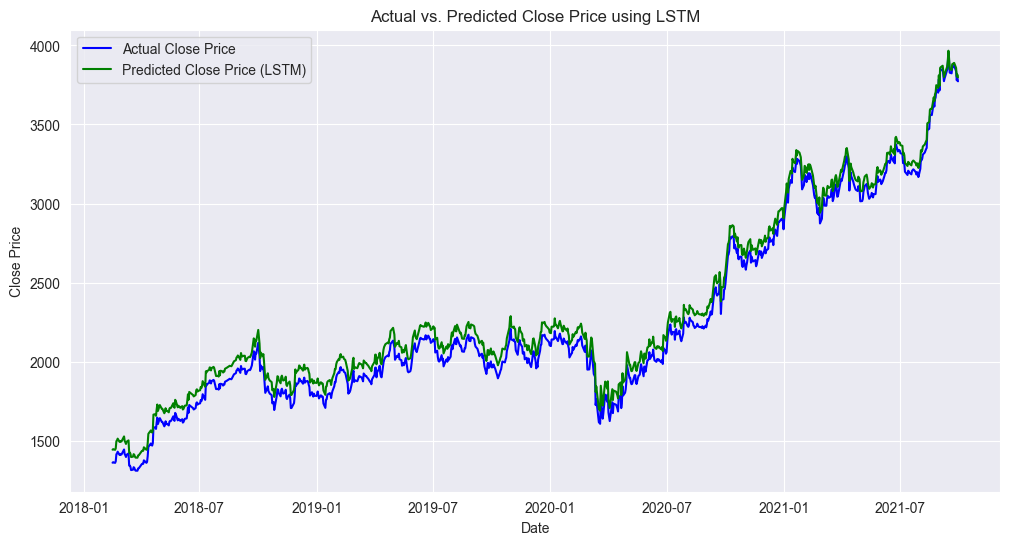

In [28]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Close'], label='Actual Close Price', color='b')
plt.plot(test_data['Date'], lstm_predictions, label='Predicted Close Price (LSTM)', color='g')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price using LSTM')
plt.legend()
plt.show()

In [35]:
# Predication on New Datasets
new_df = pd.read_csv('TCS_stock_history_New.csv')
new_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,12-08-2002,24.146938,27.102587,24.146938,26.377609,0,0.0,0
1,13-08-2002,26.563503,27.111877,26.126661,26.656437,0,0.0,0
2,14-08-2002,26.582098,27.139749,26.386910,26.888813,0,0.0,0
3,15-08-2002,26.860916,27.269876,26.433371,27.046812,0,0.0,0
4,16-08-2002,26.972458,27.334944,26.433386,27.056105,0,0.0,0
...,...,...,...,...,...,...,...,...
4458,24-09-2021,3882.100098,3904.000000,3835.000000,3869.250000,40443200,0.0,0
4459,27-09-2021,3890.000000,3944.399902,3852.449951,3871.300049,47216528,0.0,0
4460,28-09-2021,3900.000000,3945.000000,3855.000000,3885.899902,47498256,0.0,0
4461,29-09-2021,3920.000000,3980.000000,3866.000000,3903.300049,52522096,0.0,0


In [37]:
new_df_scaled = scaler.transform(new_df['Close'].values.reshape(-1, 1))
new_df_scaled

array([[-7.45814868e-13],
       [ 7.09815242e-05],
       [ 1.30137812e-04],
       ...,
       [ 9.82523642e-01],
       [ 9.86953220e-01],
       [ 1.00000000e+00]])

In [38]:
new_df_lstm = new_df_scaled.reshape(-1, 1, 1)
new_df_lstm

array([[[-7.45814868e-13]],

       [[ 7.09815242e-05]],

       [[ 1.30137812e-04]],

       ...,

       [[ 9.82523642e-01]],

       [[ 9.86953220e-01]],

       [[ 1.00000000e+00]]])

In [39]:
# Predicting the data
new_lstm_predictions = model.predict(new_df_lstm).flatten()
new_lstm_predictions

140/140 [==============================] - 0s 1ms/step


array([0.02212949, 0.02219934, 0.02225756, ..., 0.98690546, 0.9910088 ,
       1.0030723 ], dtype=float32)

In [40]:
# Inverse transform
new_lstm_predictions = new_lstm_predictions.reshape(-1, 1)
new_lstm_predictions = scaler.inverse_transform(new_lstm_predictions)
new_lstm_predictions

array([[ 113.30608],
       [ 113.58046],
       [ 113.80914],
       ...,
       [3903.1125 ],
       [3919.2312 ],
       [3966.6182 ]], dtype=float32)

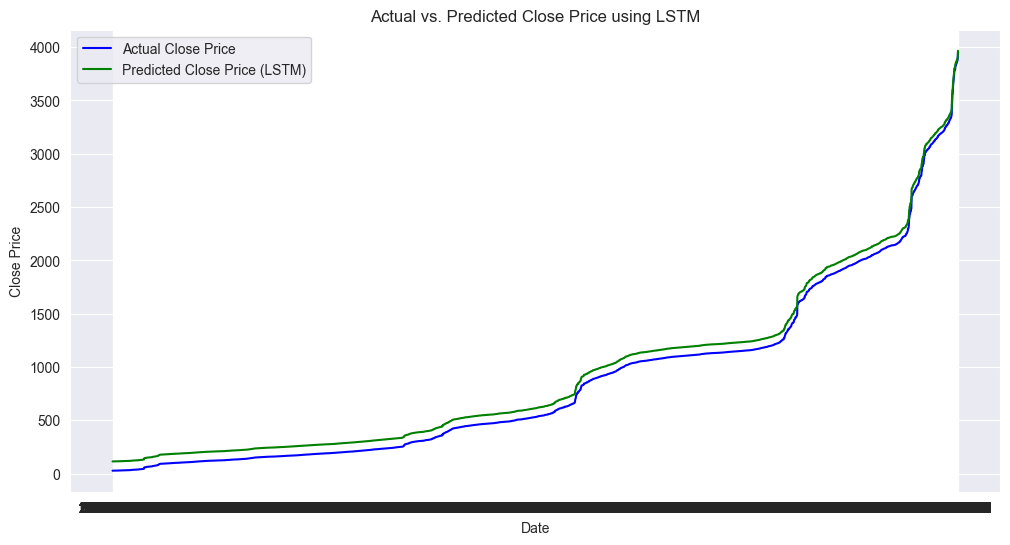

In [41]:
# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(new_df['Date'], new_df['Close'], label='Actual Close Price', color='b')
plt.plot(new_df['Date'], new_lstm_predictions, label='Predicted Close Price (LSTM)', color='g')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price using LSTM')
plt.legend()
plt.show()